In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

In [2]:
# r2 index order [task,arch,component,stat]
# Grid =   Coarse,  Med, Fine
# input = buoyancy, noise
# trial = 0,1,...,9
# component = tau11,tau12,...tau33


r2_raw=np.array([
    #Coarse
    [
     #Noise
        [[0.8279, 0.6417, 0.4656, 0.5694, 0.3827, 0.4392],
         [0.8234, 0.6715, 0.4758, 0.5974, 0.4077, 0.4212],
         [0.7793, 0.6352, 0.4656, 0.5606, 0.3526, 0.4115],
         [0.7985, 0.6605, 0.4796, 0.5509, 0.3723, 0.4559],
         [0.8106, 0.6605, 0.5106, 0.5519, 0.355,  0.4457],
         [0.7925, 0.6493, 0.4632, 0.5952, 0.3349, 0.4545],
         [0.8229, 0.6579, 0.4692, 0.5653, 0.2941, 0.425 ],
         [0.7954, 0.6759, 0.4702, 0.5499, 0.3562, 0.4494],
         [0.7811, 0.6525, 0.4454, 0.5578, 0.3717, 0.44  ],
         [0.7921, 0.6596, 0.4735, 0.5321, 0.293,  0.4707]],
        #buoyancy
        [[0.8415, 0.6617, 0.4879, 0.5999, 0.3678, 0.4072],
         [0.8463, 0.6782, 0.5036, 0.6262, 0.3029, 0.4513],
         [0.8435, 0.6673, 0.4644, 0.6044, 0.3504, 0.4019],
         [0.8543, 0.669,  0.4771, 0.6104, 0.2921, 0.3557],
         [0.8586, 0.661,  0.5235, 0.6188, 0.3041, 0.3288],
         [0.834,  0.6656, 0.4787, 0.5661, 0.3942, 0.3798],
         [0.8556, 0.6519, 0.4911, 0.5966, 0.3289, 0.4027],
         [0.8305, 0.6634, 0.4949, 0.5138, 0.3857, 0.3573],
         [0.8465, 0.66  , 0.5031, 0.621 , 0.3436, 0.389 ],
         [0.846,  0.6561, 0.496 , 0.5723, 0.3232, 0.407 ]]
        
    ],
    #Med
    [
        #Noise
        [[0.9336, 0.6899, 0.7423, 0.7745, 0.6803, 0.6152],
         [0.9331, 0.6899, 0.7452, 0.773,  0.6852, 0.6714],
         [0.9277, 0.6801, 0.7426, 0.7742, 0.681,  0.6687],
         [0.9289, 0.6903, 0.7384, 0.7715, 0.6854, 0.6651],
         [0.9226, 0.6928, 0.731 , 0.7738, 0.6763, 0.6387],
         [0.9334, 0.6927, 0.7414, 0.7768, 0.6876, 0.6596],
         [0.9318, 0.6969, 0.733 , 0.7774, 0.6849, 0.6519],
         [0.9311, 0.7016, 0.7394, 0.774,  0.6856, 0.6701],
         [0.9316, 0.6994, 0.7474, 0.7809, 0.6821, 0.6685],
         [0.9302, 0.6943, 0.7277, 0.7745, 0.677,  0.6618]],
        #buoyancy
        [[0.9379, 0.7126, 0.7399, 0.7813, 0.6891, 0.6738],
         [0.9369, 0.7154, 0.744,  0.7862, 0.6978, 0.6802],
         [0.931,  0.6966, 0.742,  0.7871, 0.6953, 0.6686],
         [0.935,  0.7088, 0.7434, 0.7879, 0.6962, 0.6815],
         [0.9349, 0.7114, 0.7502, 0.7912, 0.6918, 0.6854],
         [0.9308, 0.7048, 0.7496, 0.7875, 0.6961, 0.6741],
         [0.9388, 0.713,  0.7486, 0.7891, 0.6968, 0.6832],
         [0.9318, 0.7147, 0.7423, 0.7892, 0.6972, 0.6778],
         [0.9328, 0.7145, 0.7516, 0.7856, 0.6998, 0.6796],
         [0.9349, 0.7032, 0.737,  0.7857, 0.7001, 0.6793]]
    ],
    #Fine
    [
     #Noise
        [[0.9805, 0.9312, 0.8552, 0.8798, 0.801,  0.754 ],
         [0.9791, 0.9261, 0.8495, 0.875 , 0.793,  0.7356],
         [0.9804, 0.9294, 0.8543, 0.8759, 0.8002, 0.7542],
         [0.983 , 0.9301, 0.8531, 0.8725, 0.7984, 0.7501],
         [0.9793, 0.9292, 0.8535, 0.8758, 0.7997, 0.7459],
         [0.9802, 0.9285, 0.8525, 0.8764, 0.8012, 0.7526],
         [0.9796, 0.9291, 0.8458, 0.8797, 0.7913, 0.7401],
         [0.9811, 0.9304, 0.8563, 0.881 , 0.8039, 0.7589],
         [0.9801, 0.9277, 0.8557, 0.874 , 0.8022, 0.7554],
         [0.9825, 0.9271, 0.8547, 0.8764, 0.8028, 0.7567]],
        #buoyancy
        [[0.9923, 0.9697, 0.9295, 0.9454, 0.9016, 0.8857], # bIn0*
         [0.9926, 0.9707, 0.9285, 0.946,  0.9006, 0.8799], # bIn0*
         [0.9828, 0.9409, 0.8613, 0.8932, 0.812 , 0.768 ], # bIn2*
         [0.9843, 0.9413, 0.8617, 0.8899, 0.813 , 0.7607], # bIn2*
         [0.9826, 0.9389, 0.8614, 0.8862, 0.8103, 0.7654], # bIn2*
         [0.9824, 0.9389, 0.8626, 0.8884, 0.8122, 0.7592], # bIn3*
         [0.9826, 0.9418, 0.8613, 0.8886, 0.8126, 0.7554], # bIn3*
         [0.9824, 0.9367, 0.8613, 0.8903, 0.8142, 0.766 ], # bIn3*
         [0.9836, 0.9402, 0.8636, 0.8833, 0.815 , 0.7676], # bIn4*
         [0.9813, 0.9401, 0.8636, 0.8888, 0.8146, 0.7644]]
       
    ]

])
r2_raw.shape

(3, 2, 10, 6)

In [3]:
ngrid = r2_raw.shape[0]
ninput = r2_raw.shape[1]
ncomponent=r2_raw.shape[-1]
r2=np.zeros([ngrid,ninput,ncomponent,2])
r2.shape

(3, 2, 6, 2)

In [4]:
sigMask=np.zeros([ngrid,ncomponent])
betterOffset=np.zeros([ngrid,ncomponent])
sigMask.shape

(3, 6)

In [5]:
ptol=0.05
grid_text=['Coarse','Medium','Fine']
component_text = [r'$\tau_{11}$', r'$\tau_{12}$', r'$\tau_{13}$', r'$\tau_{22}$', r'$\tau_{23}$', r'$\tau_{33}$']
for igrid in range(ngrid):
    print(grid_text[igrid])
    for ivar in range(ncomponent):
        stat,pval=stats.ttest_ind(r2_raw[igrid,0,:,ivar],r2_raw[igrid,1,:,ivar])
        print(component_text[ivar])
        betterOffset[igrid,ivar]=float(stat<0)
#         print(stat,betterOffset[igrid,ivar])
        print('p= '+str(pval))
        if pval<ptol:
            sigMask[igrid,ivar]=1
    print()

Coarse
$\tau_{11}$
p= 1.9482982433461977e-06
$\tau_{12}$
p= 0.14332616760865888
$\tau_{13}$
p= 0.013640496546573037
$\tau_{22}$
p= 0.02838117793395836
$\tau_{23}$
p= 0.43893265969000805
$\tau_{33}$
p= 0.00040317035796781685

Medium
$\tau_{11}$
p= 0.008755609391750768
$\tau_{12}$
p= 8.379821821574731e-06
$\tau_{13}$
p= 0.02919742698360326
$\tau_{22}$
p= 8.044744013094682e-09
$\tau_{23}$
p= 1.3579568625298175e-07
$\tau_{33}$
p= 0.001891258568018449

Fine
$\tau_{11}$
p= 0.008016046325982192
$\tau_{12}$
p= 0.0005976475423857126
$\tau_{13}$
p= 0.022490130723974742
$\tau_{22}$
p= 0.007181575474642779
$\tau_{23}$
p= 0.016603251489474304
$\tau_{33}$
p= 0.03486793078042832



In [6]:
betterOffset

array([[1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [7]:
for igrid in range(ngrid):
    for iinput in range(ninput):
        for ivar in range(r2_raw.shape[-1]):
            r2[igrid,iinput,ivar,0]=np.mean(r2_raw[igrid,iinput,:,ivar])
            r2[igrid,iinput,ivar,1]=np.std(r2_raw[igrid,iinput,:,ivar])

[ 0  7 14 21 28 35]


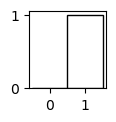

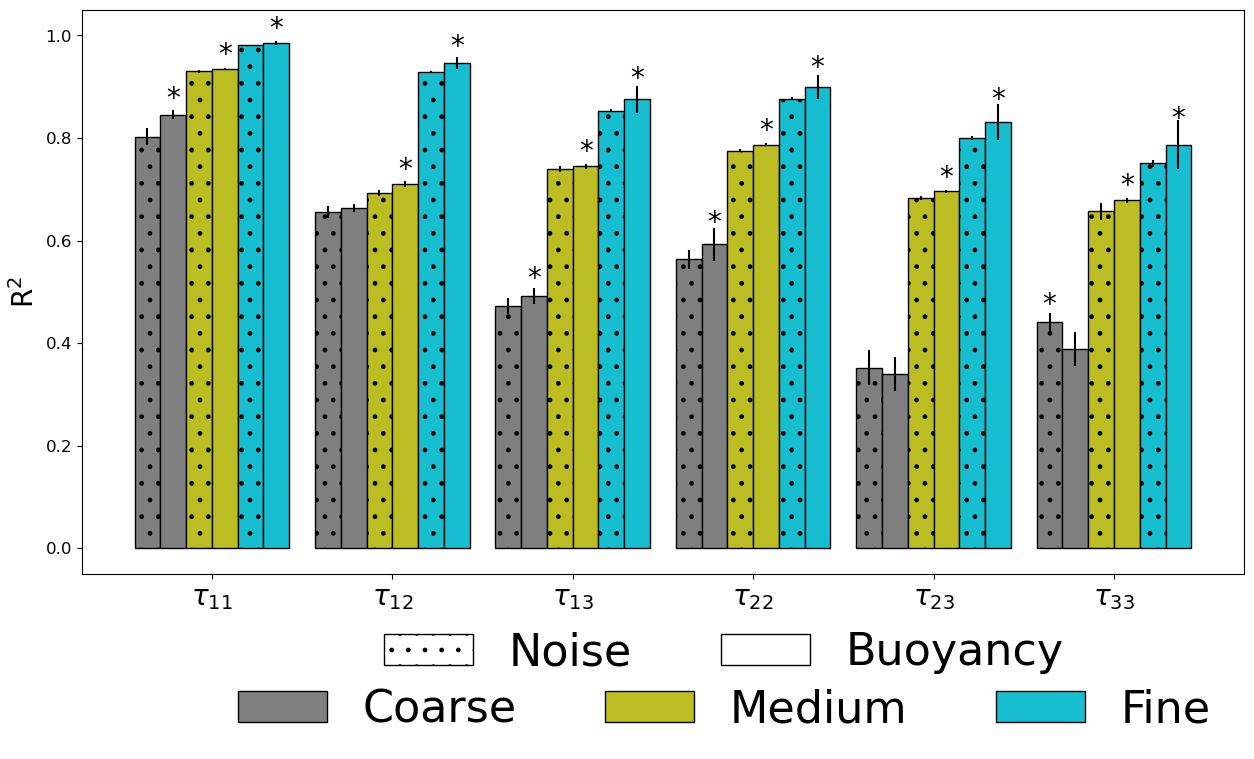

In [8]:
fs=20
ls=12

width = 1  # the width of the bars
multiplier = 0

input_text = ['Noise','Buoyancy']
hatches = ['.',None]
figdummy, axdummy = plt.subplots(1,1,figsize=(1,1))
for iinput in range(ninput): 
    axdummy.bar(iinput, iinput, width, label=input_text[iinput], color='none', edgecolor='k',hatch=hatches[iinput])
handles, labels = axdummy.get_legend_handles_labels()  
del figdummy,axdummy
grid_text=['Coarse','Medium','Fine']
colors = ['tab:gray','tab:olive','tab:cyan']
x=np.arange(0,(ngrid*ninput+1)*ncomponent,(ngrid*ninput+1))
print(x)
gridOffset=[-2,0,2]
inputOffset=[-0.5,0.5]

fig, ax = plt.subplots(1,1,figsize=(15,8))
for igrid in range(ngrid):
    for iinput in range(ninput):
        xrect=x + gridOffset[igrid]+inputOffset[iinput]
        
        rects = ax.bar(xrect, r2[igrid,iinput,:,0], width, label=grid_text[igrid], color=colors[igrid],edgecolor='k',hatch=hatches[iinput])
        bars = ax.errorbar(xrect, r2[igrid,iinput,:,0], yerr=r2[igrid,iinput,:,1], linestyle=' ', color='k')

        ax.set_ylim(-0.05, 1.05)
        ax.set_xticks([])
        ax.set_xticks(x, component_text,fontsize=fs) 
        #ax.set_title(grid_text[igrid],fontsize=fs)
        ax.tick_params(axis='y',labelsize=ls)
        
    for icomponent in range(ncomponent):
        if sigMask[igrid,icomponent]:
            ax.text(x[icomponent]+gridOffset[igrid]+(betterOffset[igrid,icomponent]-0.5), r2[igrid,int(betterOffset[igrid,icomponent]),icomponent,0]+r2[igrid,int(betterOffset[igrid,icomponent]),icomponent,1]/2.+.01, '*',fontsize=fs,ha='center')


handles2, labels2 = ax.get_legend_handles_labels()
ax.legend(handles2[1::2], labels2[::2], loc='lower left', bbox_to_anchor=(0.1, -0.35),fontsize=32,ncol=3,frameon=False,framealpha=0)
ax.set_ylabel(r'R$^2$',fontsize=fs)

fig.subplots_adjust(bottom=0.175)
fig.legend(handles,labels, loc='lower left', bbox_to_anchor=(0.3, 0.0),fontsize=32,ncol=3,frameon=False,framealpha=0)

fmt="eps"
plt.savefig('buoyancyStats.'+fmt,format=fmt,bbox_inches="tight")